# Linear Regression Project Tutorial


Simple linear regression is used to estimate the relationship between two quantitative variables. You can use it when you want to know:
- 1) How strong the relationship is between two variables (the relationship between rainfall and soil erosion).
- 2) The value of the dependent variable at a certain value of the independent variable (the amount of soil erosion at a certain level of rainfall).

## Predicting the cost of health insurance for a person

The important insurance company 4Geeks Insurance S.L. wants to calculate, based on physiological data of its customers what will be the premium (cost) to be borne by each of them. To do this, it has assembled a whole team of doctors and based on data from other companies and a particular study have managed to gather a set of data to train a predictive model.

In this dataset you will find the following variables:

- **age**. Age of primary beneficiary (numeric)
- **sex**. Gender of the primary beneficiary (categorical)
- **bmi**. Body mass index (numeric)
- **children**. Number of children/dependents covered by health insurance (numeric) 5.
- **smoker**. smoker (categorical)
- **region**. Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)
- **charges**. Health insurance premium (numerical)

In [ ]:
import pandas as pd

In [ ]:
# Example importing the CSV here

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA

In [ ]:
# Obtenemos las dimensiones del dataframe

dataframe.shape

(1338, 7)

In [ ]:
# Obtenemos la información sobre los tipos de datos y valores no nulos

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Comprobamos si existen duplicados

duplicates = dataframe.duplicated()

duplicates.sum()

1

### Análisis univariante

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'darkgrid')
%matplotlib inline

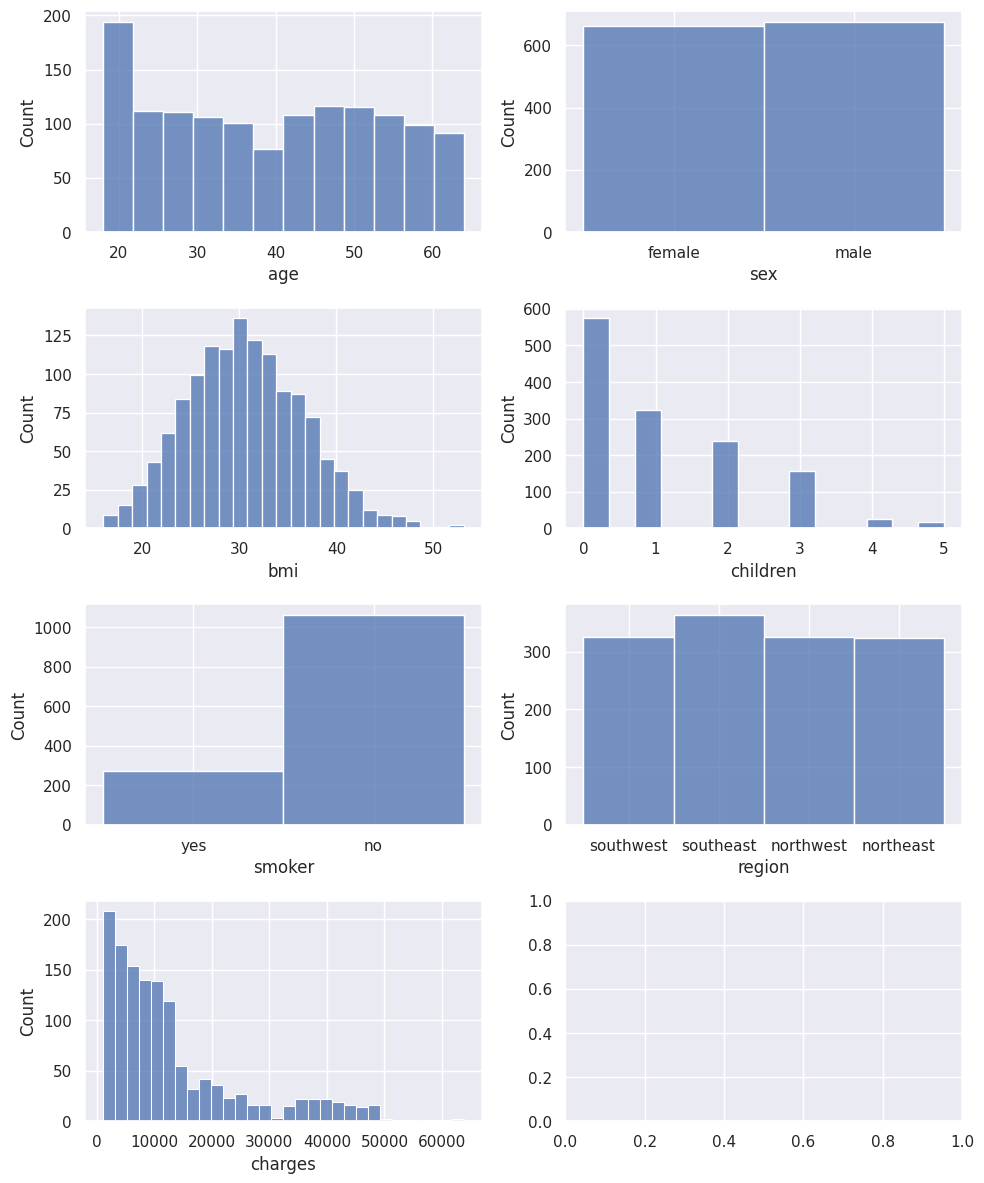

In [ ]:
fig, axis = plt.subplots(4,2, figsize = (10,12))

sns.histplot(ax = axis[0,0], data = dataframe, x = 'age')
sns.histplot(ax = axis[0,1], data = dataframe, x = 'sex')
sns.histplot(ax = axis[1,0], data = dataframe, x = 'bmi')
sns.histplot(ax = axis[1,1], data = dataframe, x = 'children')
sns.histplot(ax = axis[2,0], data = dataframe, x = 'smoker')
sns.histplot(ax = axis[2,1], data = dataframe, x = 'region')
sns.histplot(ax = axis[3,0], data = dataframe, x = 'charges')


plt.tight_layout()

plt.show()

<Axes: xlabel='bmi'>

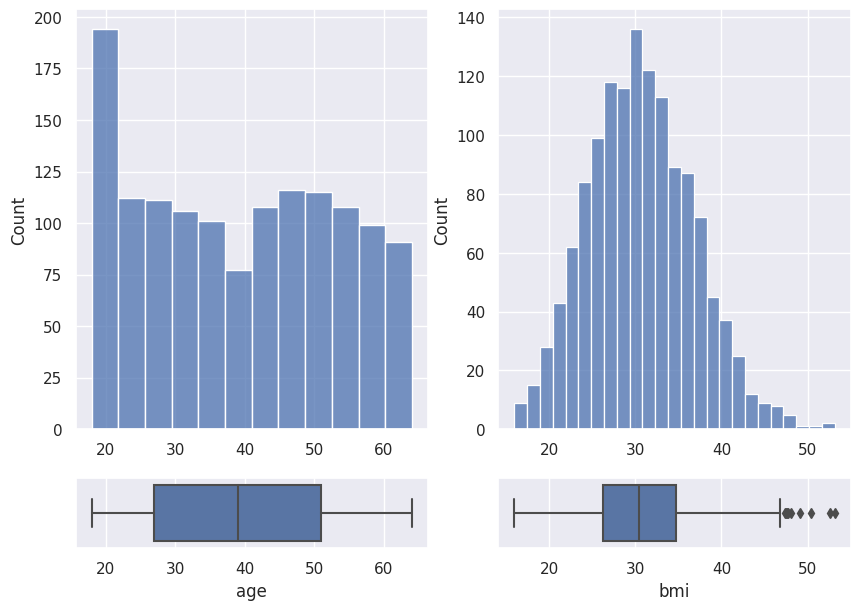

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = dataframe, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = dataframe, x = "age")
sns.histplot(ax = axis[0, 1], data = dataframe, x = "bmi").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = dataframe, x = "bmi")

La visualización del BMI nos devuelve una distribución normal pero con ciertos outliers.

### Análisis de variables multivariante

In [ ]:
# Convertimos las variables smoker y sex en numéricas

dataframe['smoker'] = pd.factorize(dataframe['smoker'])[0]
dataframe['sex'] = pd.factorize(dataframe['sex'])[0]


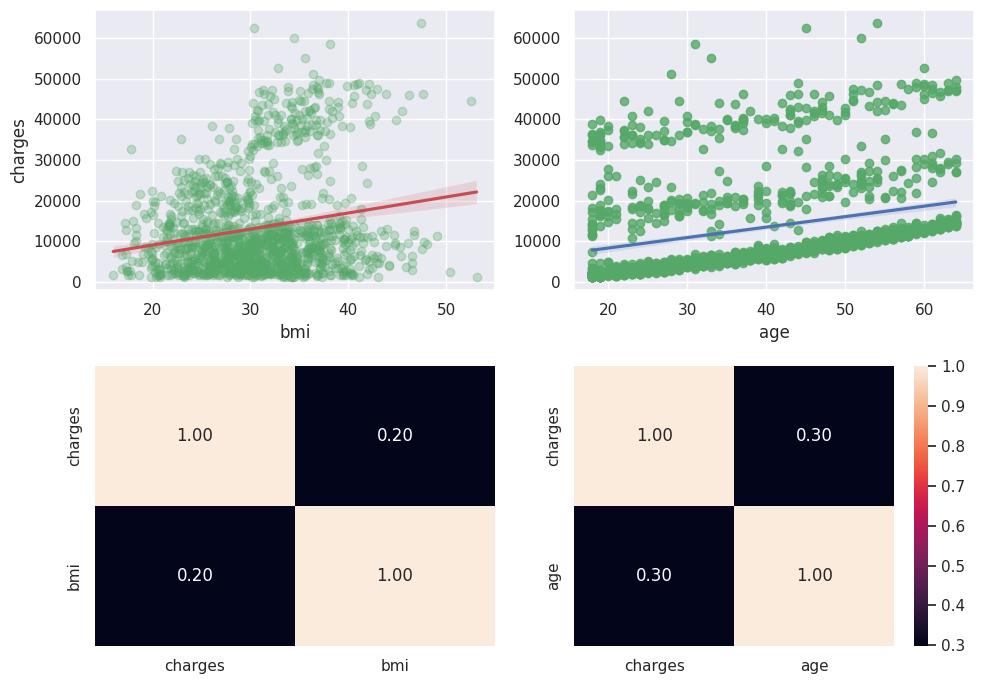

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = dataframe, x = "bmi", y = "charges", scatter_kws= {'color': 'g', 'alpha': 0.3}, line_kws = {'color': 'r'})
sns.heatmap(dataframe[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = dataframe, x = "age", y = "charges", scatter_kws= {'color': 'g'}).set(ylabel=None)
sns.heatmap(dataframe[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Tanto el BMI como la edad no influyen sobremanera sobre el coste del seguro de salud. Se observa que a mayor BMI y edad, mayor es el coste del seguro, pero no es una tendencia anormal.

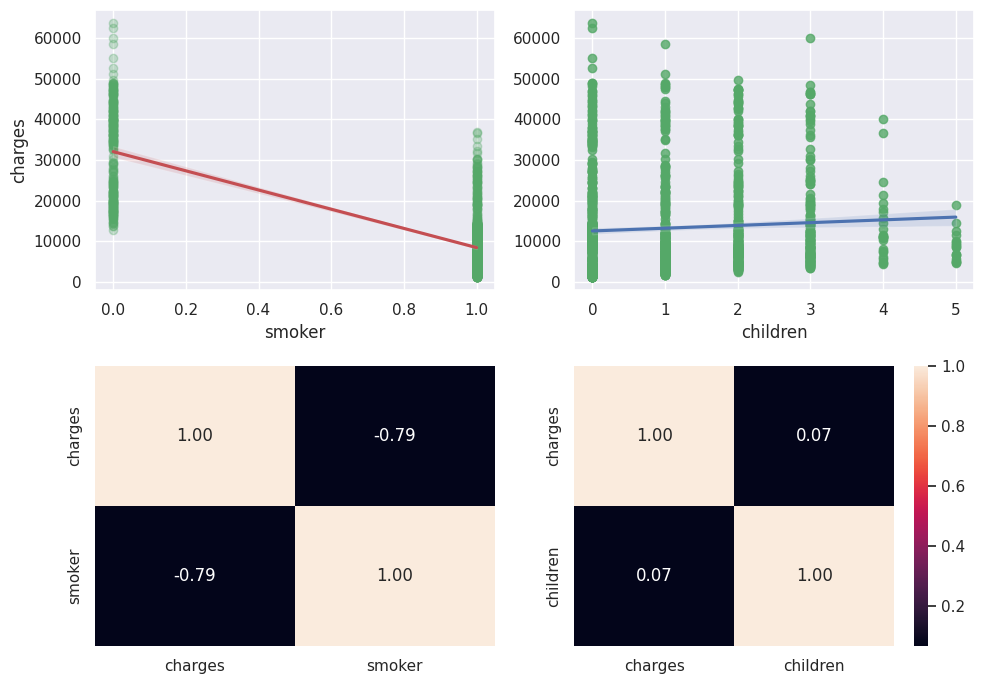

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = dataframe, x = "smoker", y = "charges", scatter_kws= {'color': 'g', 'alpha': 0.3}, line_kws = {'color': 'r'})
sns.heatmap(dataframe[["charges", "smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = dataframe, x = "children", y = "charges", scatter_kws= {'color': 'g'}).set(ylabel=None)
sns.heatmap(dataframe[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Como es de esperar, se observa una gran relación entre el coste del seguro y si el individuo es fumador o no. Por su parte, el número de hijos no impacta sobre que el coste del seguro sea mayor o no.

Análisis de correlaciones    

In [ ]:
# Vamos a convertir region en valores que puedan ser contabilizados al hacer la correlación de las varaibles,
# para ver si influye de alguna manera en el precio del seguro

dataframe['region'] = pd.factorize(dataframe['region'])[0]

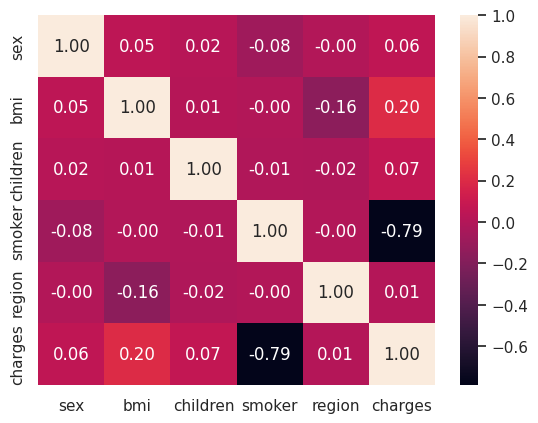

In [ ]:
sns.heatmap(dataframe[['sex', 'bmi', 'children', 'smoker', 'region', 'charges']].corr(), annot = True, fmt = '.2f')

plt.tight_layout

plt.show()

Comprobamos que, como vimos antes, smoker es la variable que más influye en el precio del seguro médico. Otras variables que tienen cierta influencia, pero no apreciable, son el índice de masa corporal (bmi) y la región.

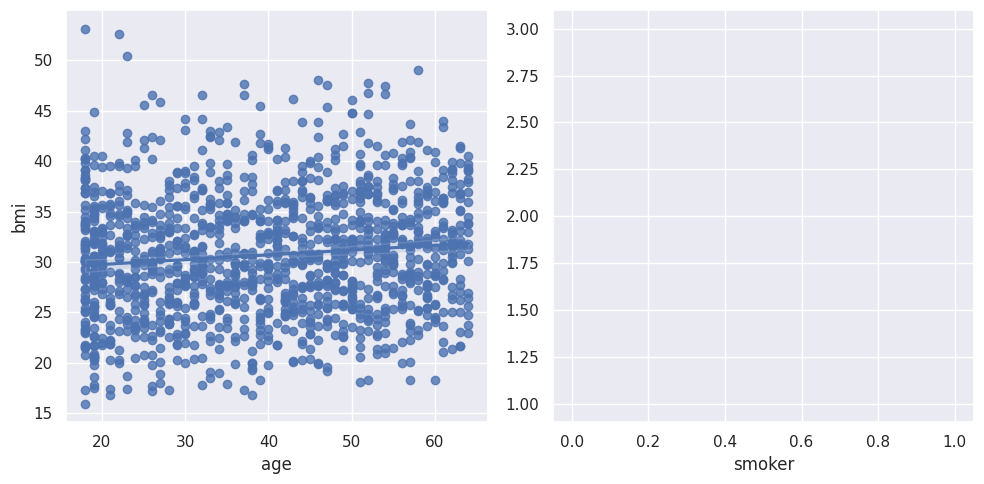

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = dataframe, x = "age", y = "bmi")
sns.regplot(ax = axis[1], data = dataframe, x = "smoker", y = "bmi").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

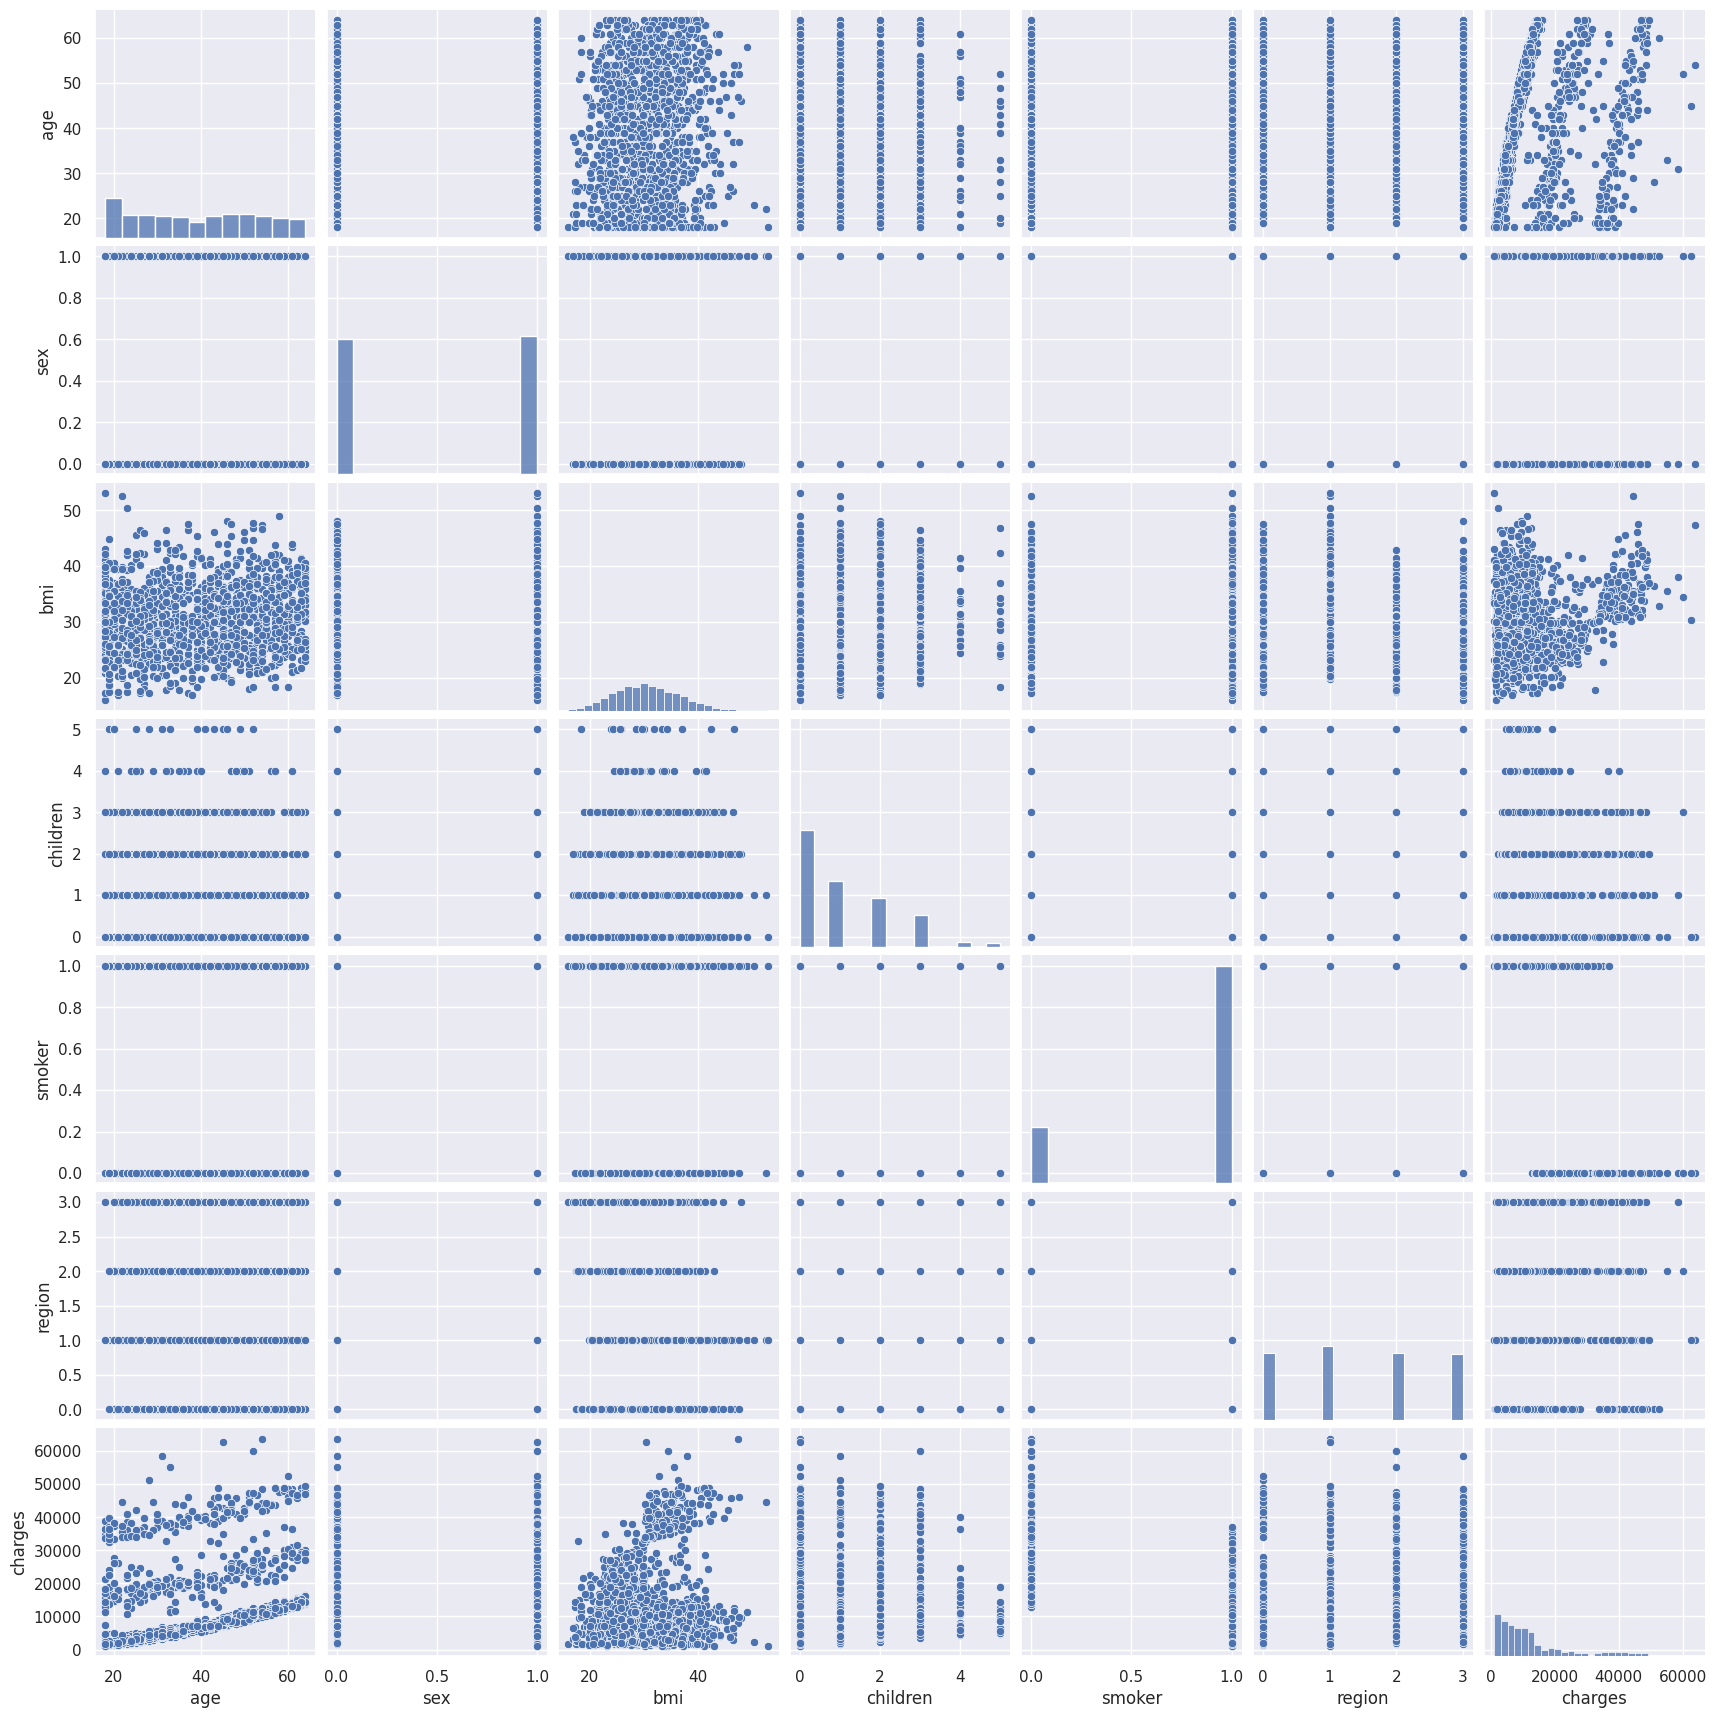

In [ ]:
sns.pairplot(data = dataframe)

## Ingeniería de características


In [ ]:
dataframe.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


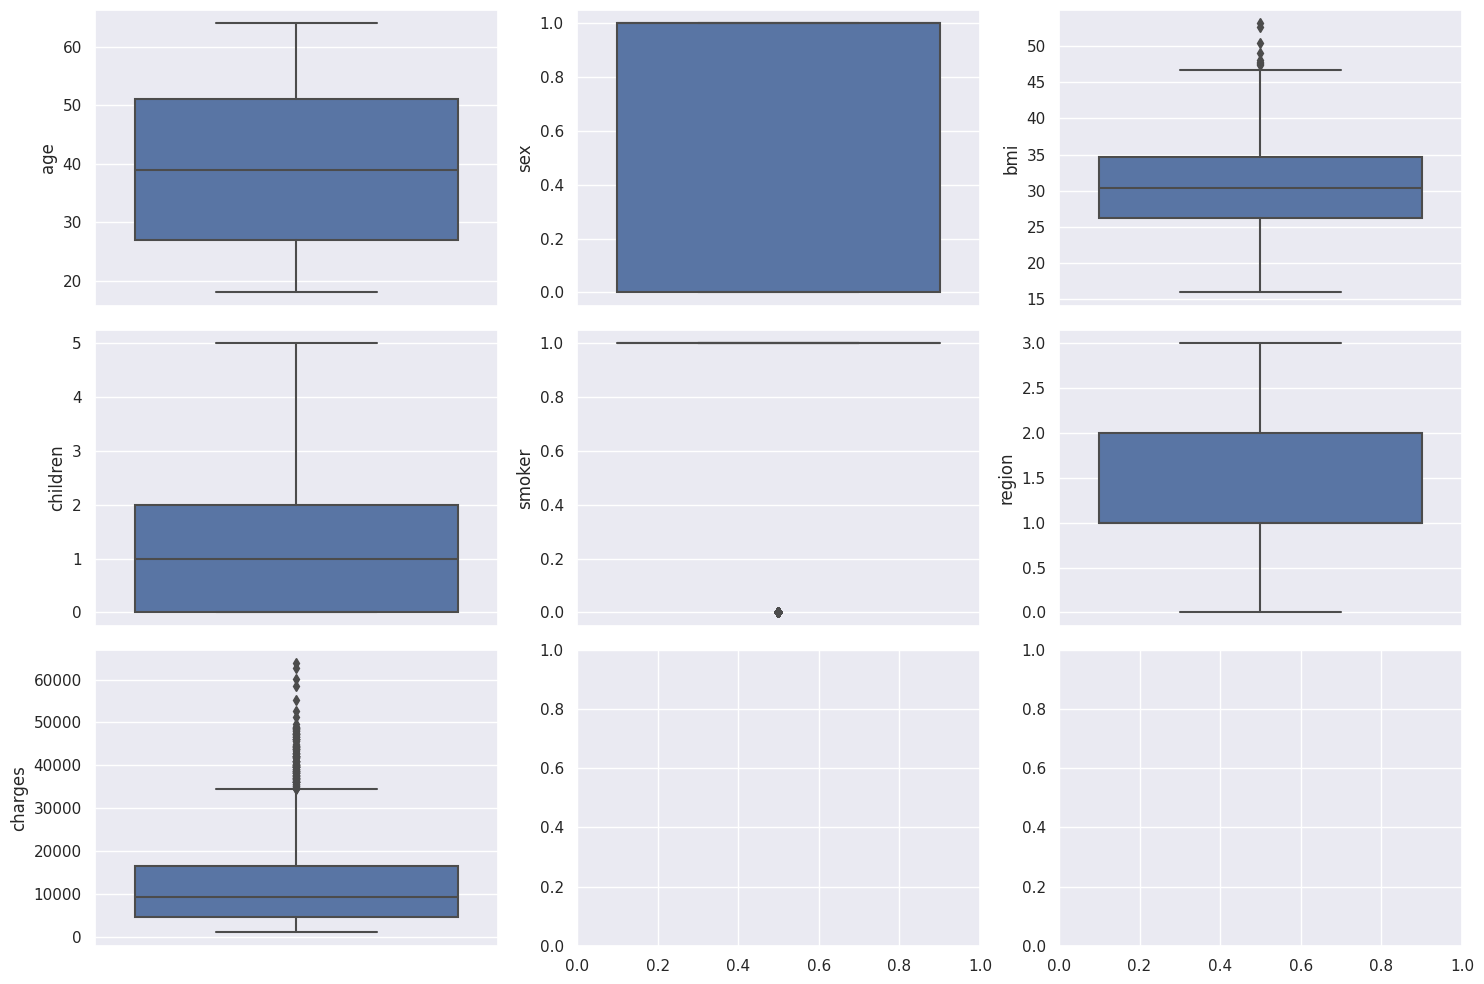

In [ ]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = dataframe, y = "age")
sns.boxplot(ax = axis[0, 1], data = dataframe, y = "sex")
sns.boxplot(ax = axis[0, 2], data = dataframe, y = "bmi")
sns.boxplot(ax = axis[1, 0], data = dataframe, y = "children")
sns.boxplot(ax = axis[1, 1], data = dataframe, y = "smoker")
sns.boxplot(ax = axis[1, 2], data = dataframe, y = "region")
sns.boxplot(ax = axis[2, 0], data = dataframe, y = "charges")

plt.tight_layout()

plt.show()

Observamos que la variable más afectada por outliers es la target: charges. BMI tiene también valores atípicos (tal y como vimos anteriormente)

In [ ]:
#vamos a comprobar si el dataset contiene valores nulos que puedan estar influyendo en los resultados
dataframe.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Escalado de valores

Paso crucial en el preprocesamiento de datos para alimentar el algoritmo de ML. Aquí se cambia el rango de los valores de los datos para que puedn ser comparables entre sí. Existen dos formas:

1) Normalización, que es el proceso de cambiar los valores para que tengan una media de 0 y una desviación estánder de 1.
2) Escaládo mínimo-máximo, que transforma los datos para que todos los valores esten entre 0 y 1.

In [ ]:
'''# Normalización

from sklearn.preprocessing import StandardScaler

num_variables = ['charges', 'age', 'sex', 'bmi', 'children', 'smoker', 'region']

scaler = StandardScaler()
norm_features = scaler.fit_transform(dataframe[num_variables])
total_data_norm = pd.DataFrame(norm_features, index = dataframe.index, columns = num_variables)
total_data_norm.head()'''

"# Normalización\n\nfrom sklearn.preprocessing import StandardScaler\n\nnum_variables = ['charges', 'age', 'sex', 'bmi', 'children', 'smoker', 'region']\n\nscaler = StandardScaler()\nnorm_features = scaler.fit_transform(dataframe[num_variables])\ntotal_data_norm = pd.DataFrame(norm_features, index = dataframe.index, columns = num_variables)\ntotal_data_norm.head()"

In [ ]:
# Aplicamos el escalado min-max para normalizar los datos y que estén todos entre 0 y 1

from sklearn.preprocessing import MinMaxScaler

num_variables = ['charges', 'age', 'sex', 'bmi', 'children', 'smoker', 'region']

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(dataframe[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = dataframe.index, columns = num_variables)
total_data_scal.head()

,charges,age,sex,bmi,children,smoker,region
0,0.251611,0.021739,0.0,0.321227,0.0,0.0,0.000000
1,0.009636,0.000000,1.0,0.479150,0.2,1.0,0.333333
2,0.053115,0.217391,1.0,0.458434,0.6,1.0,0.333333
3,0.333010,0.326087,1.0,0.181464,0.0,1.0,0.666667
4,0.043816,0.304348,1.0,0.347592,0.0,1.0,0.666667


## Selección de características

In [ ]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

# Dividimos el conjunto de datos en training y test

X = total_data_scal.drop('charges', axis = 1) # Crea una matriz "X" que contiene todas las características (columnas) del conjunto de datos,
                                              # excepto la columna "charges", que se eliminará.

y = total_data_scal['charges'] # Crea una serie "y" que contiene los valores de la columna "charges", que es la variable objetivo que queremos predecir.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Divide los datos en conjuntos de entrenamiento y prueba,
                                                                                              # donde el 80% se usa para entrenar el modelo (X_train y y_train)
                                                                                              # y el 20% se usa para probar su rendimiento (X_test y y_test).

selection_model = SelectKBest(f_regression, k = 6) # El método SelectKBest se utiliza para seleccionar las características más relevantes del conjunto de datos
                                                   # basándose en un criterio específico, que en este caso es f_regression.
                                                   # f_regression es una técnica estadística que se utiliza  para evaluar la relación lineal
                                                   # entre una variable dependiente y varias variables independientes.

selection_model.fit(X_train, y_train) # Ajusta el modelo de selección de características utilizando los datos de entrenamiento (X_train y y_train)

ix = selection_model.get_support() # Obtiene un vector booleano que indica qué características fueron seleccionadas (True) y cuáles no (False)

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix]) # Transforma el conjunto de prueba usando solo
                                                                                                     # las características seleccionadas y crea un nuevo
                                                                                                     # DataFrame X_train_sel con esas características

X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix]) # Transforma el conjunto de prueba usando solo
                                                                                                  # las características seleccionadas y crea  un nuevo
                                                                                                  # DataFrame X_test_sel con esas características

X_train_sel.head()

,age,sex,bmi,children,smoker,region
0,0.608696,0.0,0.107345,0.4,1.0,0.666667
1,0.630435,0.0,0.224913,0.0,1.0,1.000000
2,0.739130,0.0,0.239440,0.0,1.0,0.333333
3,0.456522,0.0,0.493947,1.0,1.0,0.333333
4,0.782609,0.0,0.148238,0.6,1.0,0.666667


In [ ]:
X_train

,age,sex,bmi,children,smoker,region
560,0.608696,0.0,0.107345,0.4,1.0,0.666667
1285,0.630435,0.0,0.224913,0.0,1.0,1.000000
1142,0.739130,0.0,0.239440,0.0,1.0,0.333333
969,0.456522,0.0,0.493947,1.0,1.0,0.333333
486,0.782609,0.0,0.148238,0.6,1.0,0.666667
...,...,...,...,...,...,...
1095,0.000000,0.0,0.414044,0.8,1.0,1.000000
1130,0.456522,0.0,0.212806,1.0,1.0,0.333333
1294,0.869565,1.0,0.247915,0.0,1.0,1.000000
860,0.413043,0.0,0.851224,0.4,0.0,0.000000


In [ ]:
y_train

560     0.128845
1285    0.118324
1142    0.414952
969     0.119316
486     0.181225
          ...   
1095    0.054899
1130    0.119084
1294    0.172538
860     0.718159
1126    0.145139
Name: charges, Length: 1070, dtype: float64

## Regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sel, y_train)

LinearRegression()

In [ ]:
print(f"Intercepto (a): {model.intercept_}") # model.intercept_ es el valor numérico que nos muestra dónde comienza la línea de regresión
                                             # en el eje vertical (y)
print(f"Coeficientes (b): {model.coef_}") # model.coef_ muestra cómo cada variable independiente contribuye al resultado del modelo

Intercepto (a): 0.31527575461646196
Coeficientes (b): [ 1.88744789e-01 -2.99950365e-04  1.99222443e-01  3.39266773e-02
 -3.77467899e-01  1.29907675e-02]


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 1.24544508e-01,  9.56833115e-02,  5.71236482e-01,  1.33857851e-01,
        4.13281304e-01,  1.54335655e-01, -1.42952294e-02,  2.52533236e-01,
       -1.04141439e-03,  1.61951799e-01,  4.29805993e-01,  1.32524836e-01,
        6.71116593e-02,  5.95994382e-01,  6.25417979e-01,  5.75035397e-01,
        2.26119263e-01,  5.56168956e-01,  1.28611131e-01,  4.85070382e-01,
        4.27131451e-02,  1.42843746e-01,  1.90060510e-02,  9.50147959e-02,
        1.63299832e-01,  1.88127197e-01,  2.12725945e-01,  8.11477001e-02,
        1.40388467e-01,  1.78396205e-02,  1.26717702e-01,  1.91523786e-01,
        5.58006993e-02,  3.74476047e-02,  5.23695138e-02,  1.89087240e-01,
        1.28585743e-02,  1.21886997e-01,  5.14017895e-01,  5.03069919e-01,
        4.35851027e-02,  5.18531170e-02,  2.06850525e-01,  1.65315230e-01,
        1.23025784e-01,  1.74373973e-01,  6.70555182e-02,  3.15863303e-02,
        5.49489642e-01,  1.28969266e-01,  2.35797361e-01,  2.04979373e-02,
        1.79982552e-01,  

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}") # El Error Cuadrático Medio nos permite medir cuánto se desvían las predicciones
                                                                       # de un modelo de los valores esperados.
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}") # El coeficiente de determinación (R-cuadrado o R²) qué ta bien un modelo se adapta
                                                                   # a los datos. Un valor alto significa que el modelo es confiable para hacer predicciones,
                                                                   # mientras que un valor bajo sugiere que el modelo necesita mejorarse.

Error cuadrático medio: 0.00856982679944619
Coeficiente de determinación: 0.7833463107364538
